In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import calmap 
#from pandas_profiling import ProfileReport

In [4]:
df=pd.read_csv('supermarket_sales.csv')

In [5]:
df.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,NaN,10.0,8.7450,183.6450,2/22/19,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,NaN,1.0,3.0475,63.9975,2/18/19,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2/9/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.8030,121.8630,3/10/19,20:46,Ewallet,116.06,4.761905,5.8030,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.4780,640.0380,1/26/19,15:17,Cash,609.56,4.761905,30.4780,5.5


In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df.set_index('Date', inplace=True)

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.220351e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## Task 2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


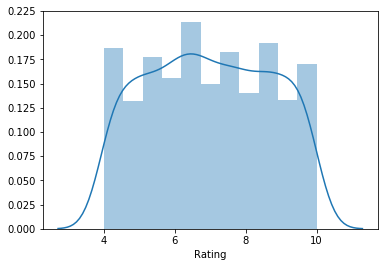

In [11]:
sns.distplot(df['Rating'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


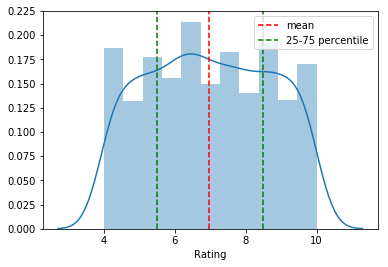

In [12]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--',label = 'mean')
plt.axvline(x=np.percentile(df['Rating'],25), c='green', ls='--',label = '25-75 percentile')
plt.axvline(x=np.percentile(df['Rating'],75), c='green', ls='--')
plt.legend()

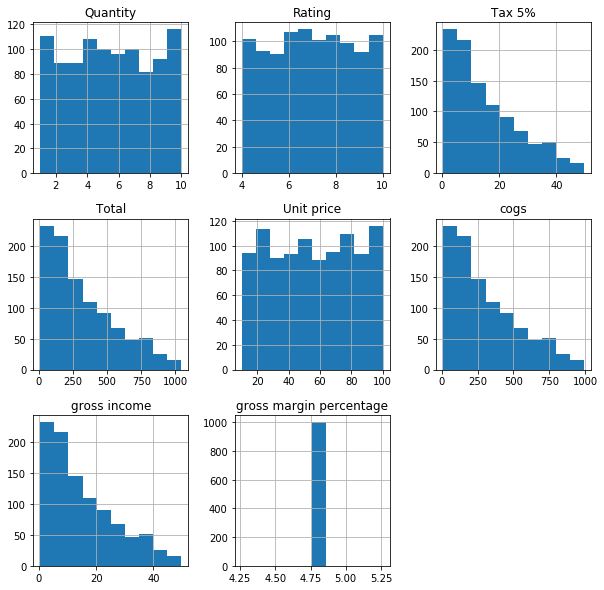

In [13]:
df.hist(figsize=(10,10));

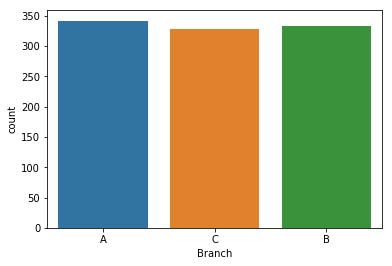

In [14]:
sns.countplot(df['Branch']);

In [15]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

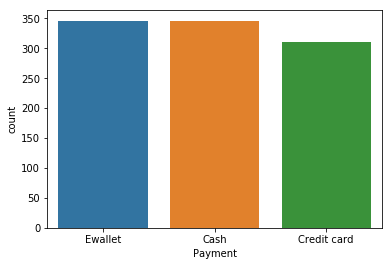

In [16]:
sns.countplot(df['Payment']);

Q 3:

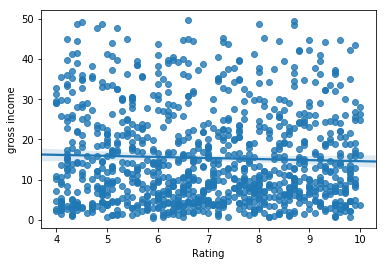

In [17]:
sns.regplot(df['Rating'],df['gross income'])

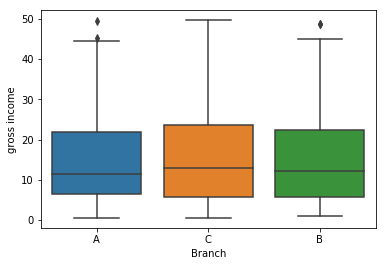

In [18]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

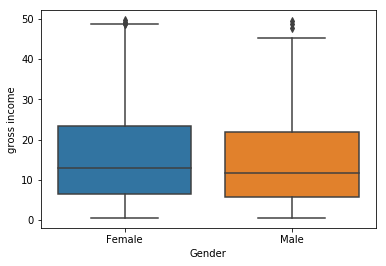

In [19]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

In [20]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [21]:
sns.lineplot(x=df.groupby(df.index).mean().index,
            y= df.groupby(df.index).mean()['gross income'])

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [27]:
df = df.drop_duplicates()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 to 2019-02-18
Data columns (total 16 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              921 non-null object
Gender                     1000 non-null object
Product line               957 non-null object
Unit price                 994 non-null float64
Quantity                   981 non-null float64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(8), object(8)
memory usage: 132.8+ KB


In [29]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

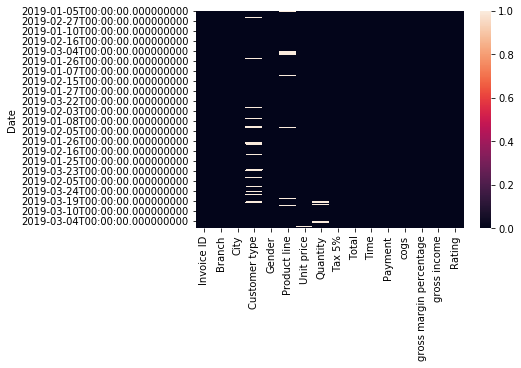

In [30]:
sns.heatmap(df.isna())

In [31]:
df.fillna(df.mean(), inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [33]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                             55.7003
Quantity                                    10
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage                 4.7619
gross income                             4.154
Rating                                       6
Name: 0, dtype: object

In [34]:
df.fillna(df.mode().iloc[0])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.690000,7.000000,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.280000,5.000000,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.330000,7.000000,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.220000,8.000000,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.310000,7.000000,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3
2019-03-25,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.390000,7.000000,29.8865,627.6165,18:30,Ewallet,597.73,4.761905,29.8865,4.1
2019-02-25,355-53-5943,A,Yangon,Member,Female,Fashion accessories,68.840000,6.000000,20.6520,433.6920,14:36,Ewallet,413.04,4.761905,20.6520,5.8
2019-02-24,315-22-5665,C,Naypyitaw,Normal,Female,Fashion accessories,73.560000,10.000000,36.7800,772.3800,11:38,Ewallet,735.60,4.761905,36.7800,8.0
2019-01-10,665-32-9167,A,Yangon,Member,Female,Fashion accessories,36.260000,2.000000,3.6260,76.1460,17:15,Credit card,72.52,4.761905,3.6260,7.2


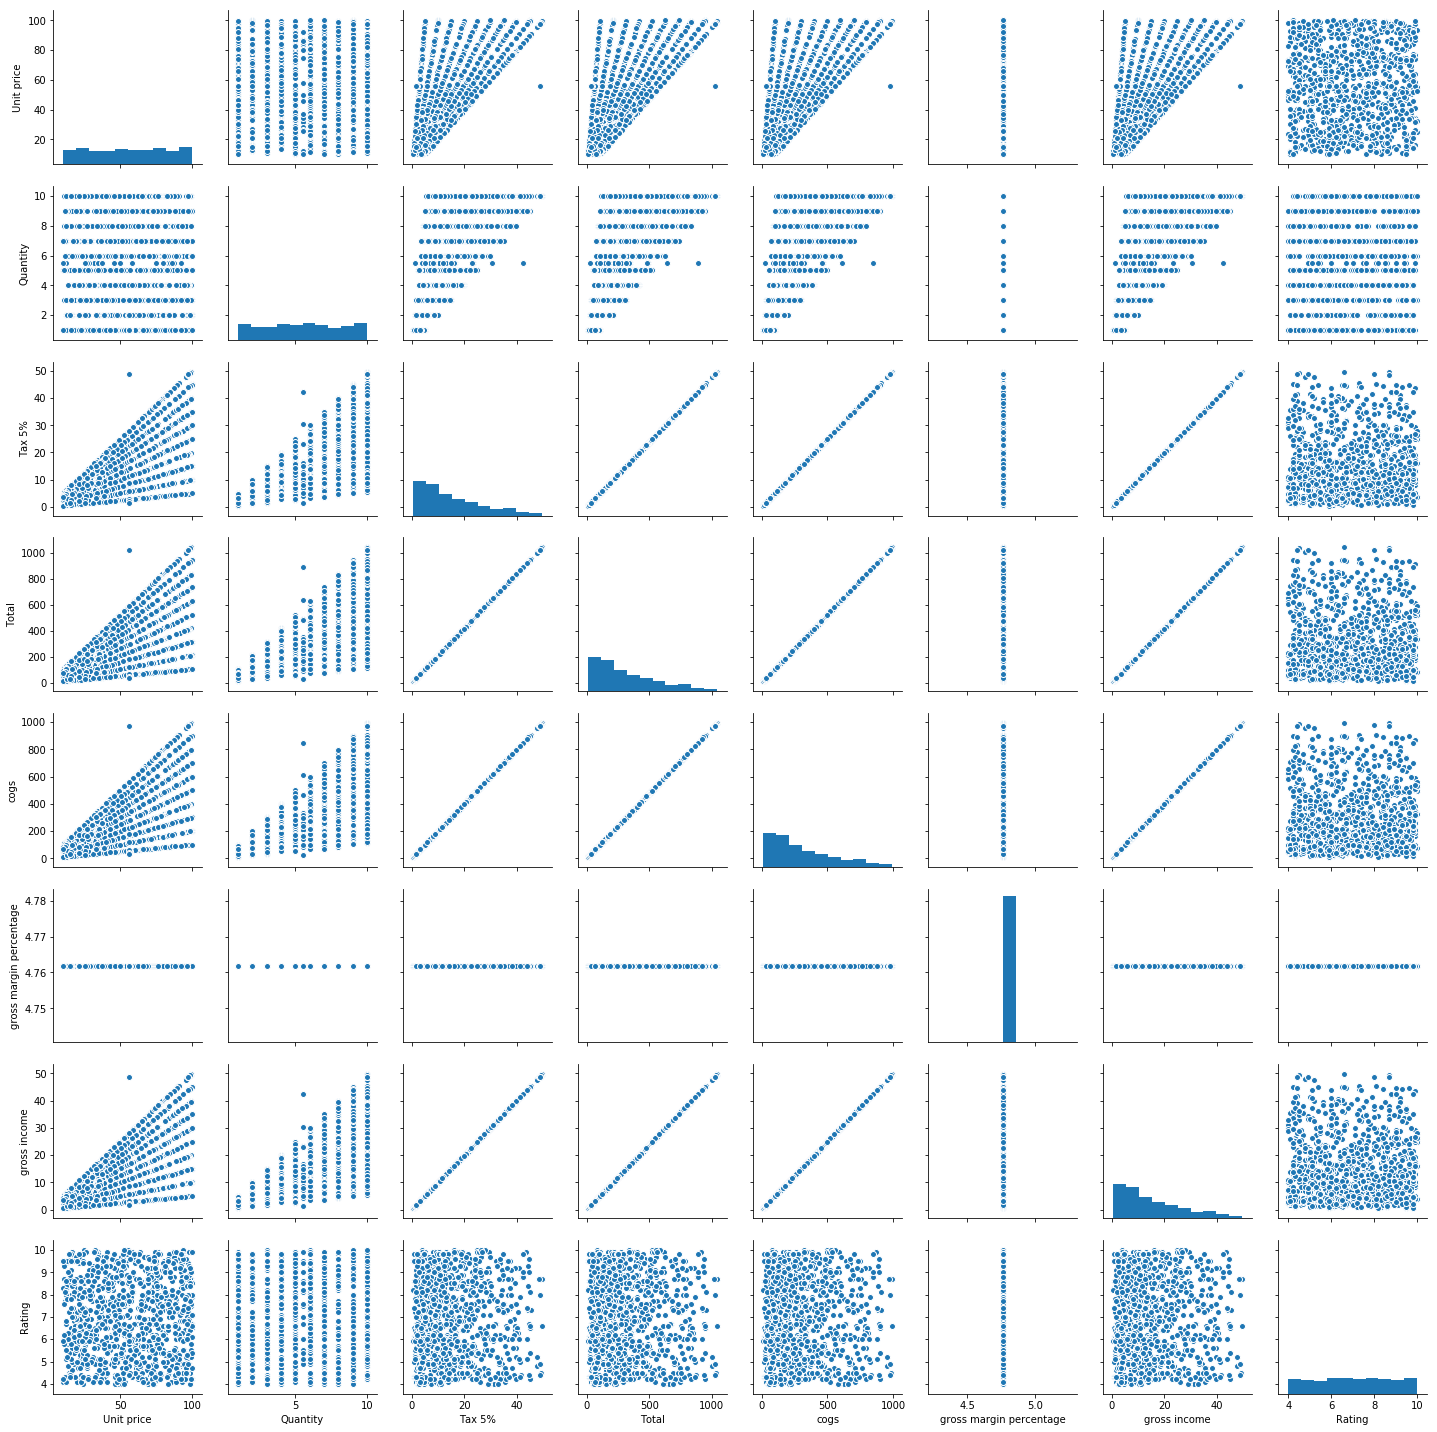

In [35]:
sns.pairplot(df)

In [36]:
'''
#pandas profiler
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof'''

"\n#pandas profiler\ndataset = pd.read_csv('supermarket_sales.csv')\nprof = ProfileReport(dataset)\nprof"

## Task 5

In [39]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [40]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.478639e-02,6.290338e-01,6.290338e-01,6.290338e-01,-4.482629e-16,6.290338e-01,-6.601308e-03
Quantity,1.478639e-02,1.000000e+00,7.040671e-01,7.040671e-01,7.040671e-01,-8.293717e-17,7.040671e-01,-2.122532e-02
Tax 5%,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Total,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02
cogs,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02
gross margin percentage,-4.482629e-16,-8.293717e-17,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15
gross income,6.290338e-01,7.040671e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02
Rating,-6.601308e-03,-2.122532e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00


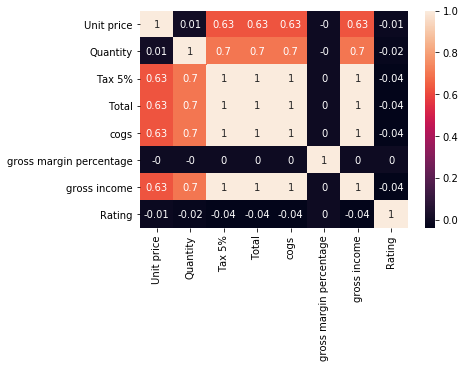

In [45]:
sns.heatmap(np.round(df.corr(),2), annot=True)